In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as  sns
import copy

In [4]:
data = pd.read_excel('data2.xlsx')

In [5]:
data_copy = copy.deepcopy(data)

In [6]:
features = data[['x_coordinate', 'y_coordinate']]

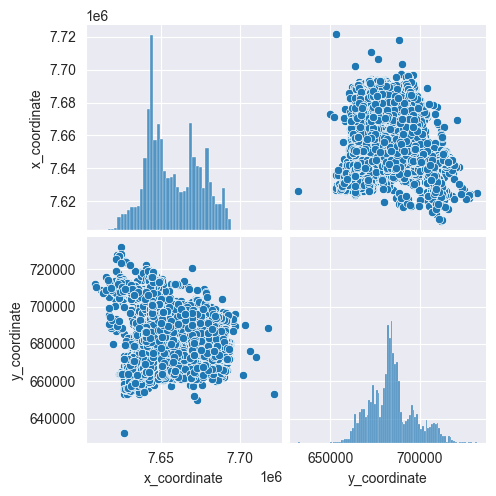

In [7]:
sns.pairplot(features)

/Users/jainampatel/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jainampatel/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jainampatel/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jainampatel/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

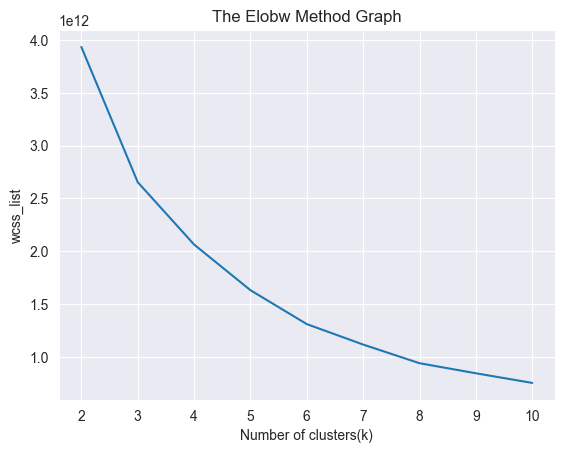

[0.48291158098415254, 0.46777685779440276, 0.43212939014231116, 0.444257356569704, 0.4533341552315079, 0.44902247504108095, 0.4267847449023628, 0.4202014884172473, 0.4155623671698032]


In [20]:

wcss_list= []  #Initializing the list for the values of WCSS  
score = []
#Using for loop for iterations from 1 to 10.  
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    labels = kmeans.fit_predict(features)
    score.append(silhouette_score(features,labels,metric='euclidean'))
    wcss_list.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()
print(score)

In [9]:
num_clusters = 4
#k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

/Users/jainampatel/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


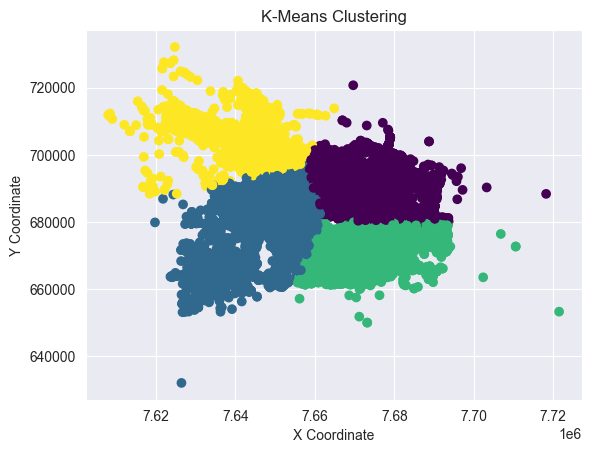

In [10]:
plt.scatter(data['x_coordinate'], data['y_coordinate'], c=data['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [17]:
dbscan = DBSCAN(eps=50000, min_samples=2)  # Adjust eps and min_samples based on your data
data_copy['cluster'] = dbscan.fit_predict(features)
silhouette_avg = silhouette_score(features, data['cluster'],metric = 'euclidean')
silhouette_avg

0.43212939014231116

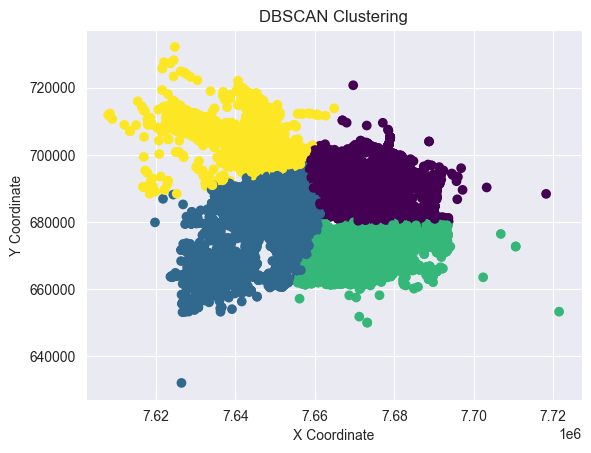

In [12]:
plt.scatter(data['x_coordinate'], data['y_coordinate'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()